In [2]:
import pandas as pd
from accre_functions import *

Initializing the data.
Now reading '../data/updated_jobs.csv'.


Reading CSV: 100%|██████████| 7395885/7395885 [00:43<00:00, 170493.78rows/s]


Completed reading '../data/updated_jobs.csv'.
Now reading '../data/servers_9204.csv'.


Reading CSV: 100%|██████████| 314709/314709 [00:01<00:00, 218831.82rows/s]


Completed reading '../data/servers_9204.csv'.


c:\Users\irela\Documents\NSS_Projects\accre-sweet-potato-casserole\notebooks\accre_functions.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.jobs_filtered_by_completed['end_dt_min_start'] = self.jobs_filtered_by_completed['END_dt'].dt.floor('min')


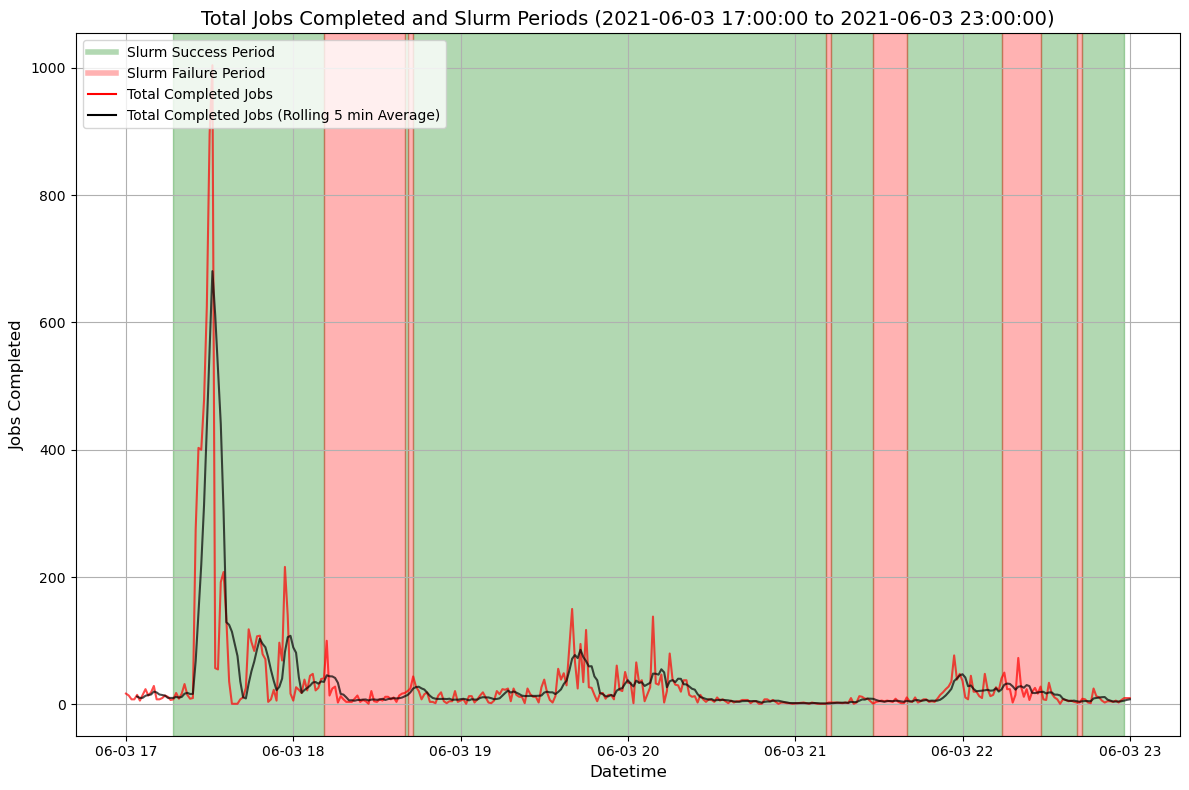

In [3]:
processor = ACCREDataProcessor()
processor.plot_jobs_and_servers_with_slurm_periods(begin_date='2021-06-03 17:00:00', end_date='2021-06-03 23:00:00', rolling=5)

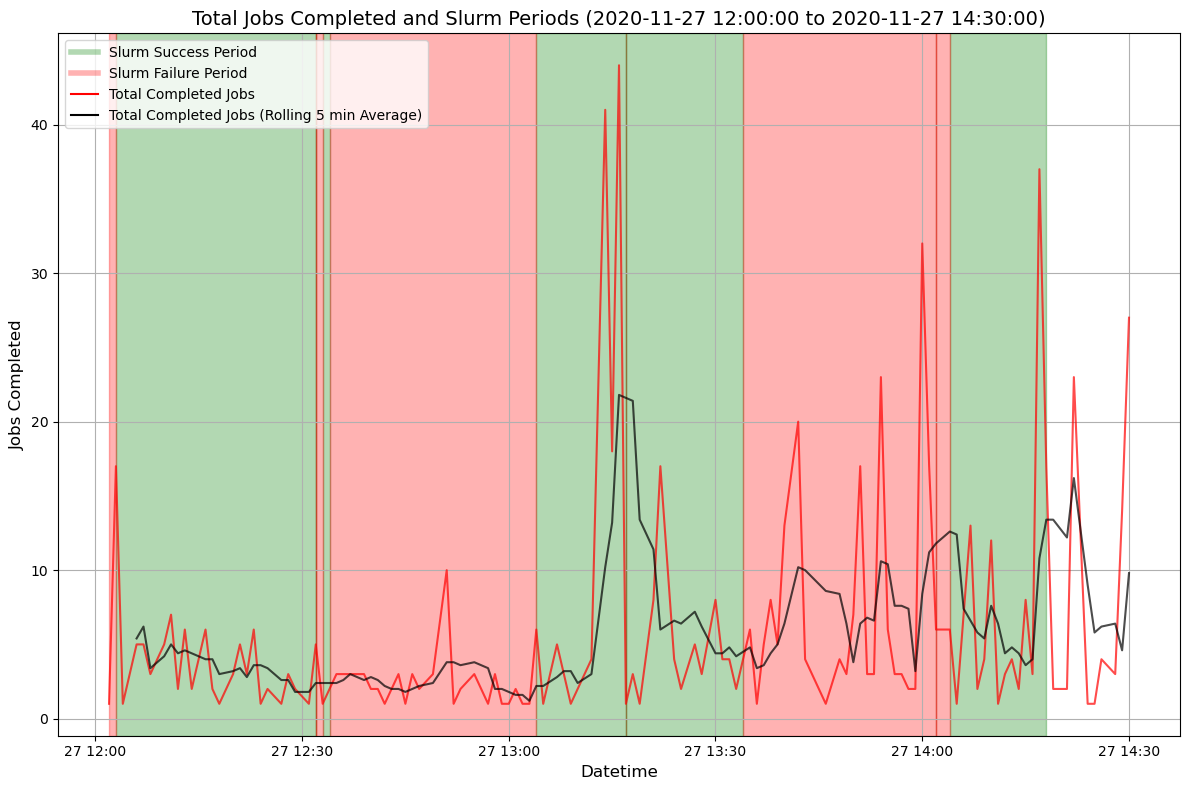

In [4]:
processor.plot_jobs_and_servers_with_slurm_periods(begin_date='2020-11-27 12:00:00', end_date='2020-11-27 14:30:00', rolling=5)

In [5]:
data_df = processor.data
data_df.head(2)

,total_completed_jobs,slurm_success
datetime,,
2020-10-01 00:10:00,1.0,NaN
2020-10-01 00:12:00,1.0,NaN


In [6]:
import statsmodels.formula.api as smf
import numpy as np

In [7]:
def logistic(x):
    return 1/(1+np.exp(-x))

In [8]:
window_sizes = [str(x)+'min' for x in range(1, 5)]
results = {}
for window in window_sizes:
    rolling_col_name = f'rolling_completed_jobs_{window}'
    data_df[rolling_col_name] = data_df['total_completed_jobs'].rolling(window, closed='left').mean()
    formula = f'slurm_success ~ total_completed_jobs + {rolling_col_name} + (total_completed_jobs * {rolling_col_name})'
    model = smf.logit(formula, data=data_df).fit()
    results[window] = model
    print(f"Summary for {window} rolling average:")
    print(model.summary())

Optimization terminated successfully.
         Current function value: 0.156800
         Iterations 8
Summary for 1min rolling average:
                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:                44493
Model:                          Logit   Df Residuals:                    44489
Method:                           MLE   Df Model:                            3
Date:                Thu, 05 Dec 2024   Pseudo R-squ.:                0.005155
Time:                        19:37:33   Log-Likelihood:                -6976.5
converged:                       True   LL-Null:                       -7012.6
Covariance Type:            nonrobust   LLR p-value:                 1.370e-15
                                                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------

In [9]:
processor.test_range_rolling_completed_jobs()

Optimization terminated successfully.
         Current function value: 0.156812
         Iterations 8
Summary for 1min rolling average:
                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:                44493
Model:                          Logit   Df Residuals:                    44490
Method:                           MLE   Df Model:                            2
Date:                Thu, 05 Dec 2024   Pseudo R-squ.:                0.005076
Time:                        19:37:35   Log-Likelihood:                -6977.1
converged:                       True   LL-Null:                       -7012.6
Covariance Type:            nonrobust   LLR p-value:                 3.475e-16
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.2139  

In [10]:
processor.calculate_rolling_probability(rolling_jobs_completed=10, total_completed_jobs=101, rolling_period='1min')

0.9335660531491711

In [11]:
rolling_jobs_completed = 100
total_completed_jobs = 50
rolling_period = '2min'
rolling_formula_result = results[rolling_period].params['Intercept'] + results[rolling_period].params['total_completed_jobs']*total_completed_jobs + results[rolling_period].params['rolling_completed_jobs_'+rolling_period]*rolling_jobs_completed
prob = logistic(rolling_formula_result)
prob

0.9777995083446949

In [12]:
processor.data.head()

,total_completed_jobs,slurm_success,rolling_completed_jobs_1min,rolling_completed_jobs_2min,rolling_completed_jobs_3min,rolling_completed_jobs_4min
datetime,,,,,,
2020-10-01 00:10:00,1.0,NaN,NaN,NaN,NaN,NaN
2020-10-01 00:12:00,1.0,NaN,NaN,1.0,1.0,1.0
2020-10-01 00:13:00,1.0,NaN,1.0,1.0,1.0,1.0
2020-10-01 00:17:00,2.0,NaN,NaN,NaN,NaN,1.0
2020-10-01 00:19:00,1.0,NaN,NaN,2.0,2.0,2.0


In [13]:
processor.test_range_rolling_completed_jobs(range_begin=1, range_end=6, step_size=1)

Optimization terminated successfully.
         Current function value: 0.156812
         Iterations 8
Summary for 1min rolling average:
                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:                44493
Model:                          Logit   Df Residuals:                    44490
Method:                           MLE   Df Model:                            2
Date:                Thu, 05 Dec 2024   Pseudo R-squ.:                0.005076
Time:                        19:37:37   Log-Likelihood:                -6977.1
converged:                       True   LL-Null:                       -7012.6
Covariance Type:            nonrobust   LLR p-value:                 3.475e-16
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.2139  

In [14]:
processor.calculate_rolling_probability(rolling_jobs_completed=10, total_completed_jobs=500, rolling_period='2min')

0.5828818090615814

In [15]:
#processor.test_range_rolling_completed_jobs(range_begin=150, range_end=300, step_size=10, closed='right')

In [16]:
processor.calculate_rolling_probability(rolling_jobs_completed=100, total_completed_jobs=100, rolling_period='2min')

0.968923001387792

In [17]:
data = processor.data
#data['rolling_left_180min'] = data['total_completed_jobs'].rolling('2min', closed='left').mean()
#data['rolling_right_180min'] = data['total_completed_jobs'].rolling('180min', closed='right').mean()
data.head(2)

,total_completed_jobs,slurm_success,rolling_completed_jobs_1min,rolling_completed_jobs_2min,rolling_completed_jobs_3min,rolling_completed_jobs_4min,rolling_completed_jobs_5min
datetime,,,,,,,
2020-10-01 00:10:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-01 00:12:00,1.0,NaN,NaN,1.0,1.0,1.0,1.0


In [18]:
#leftright_logreg = smf.logit('slurm_success ~ total_completed_jobs + rolling_right_180min + (total_completed_jobs * rolling_right_180min)', data=data).fit()
#leftright_logreg.summary()

In [19]:
"""
data = processor.data
data_w = data
data_w['future_av'] = data_w.apply()

# Calculate the average of completed jobs within this range
average_completed_jobs = filtered_data['total_completed_jobs'].mean()
time_span = [str(x)+'min' for x in range(45, 60, 1)]
rolling_range_dict = {}
for period in time_span:
    rolling_col_name = f'rolling_right_{period}'
    print(rolling_col_name)
    data[rolling_col_name] = data['total_completed_jobs'].shift().rolling(period, closed='right').mean()
    function = f'slurm_success ~ total_completed_jobs + {rolling_col_name} + (total_completed_jobs *{rolling_col_name})'
    model = smf.logit(function, data=data).fit()
    rolling_range_dict[period] = model
    print(f"Summary for {period} rolling average:")
    print(model.summary())
"""

'\ndata = processor.data\ndata_w = data\ndata_w[\'future_av\'] = data_w.apply()\n\n# Calculate the average of completed jobs within this range\naverage_completed_jobs = filtered_data[\'total_completed_jobs\'].mean()\ntime_span = [str(x)+\'min\' for x in range(45, 60, 1)]\nrolling_range_dict = {}\nfor period in time_span:\n    rolling_col_name = f\'rolling_right_{period}\'\n    print(rolling_col_name)\n    data[rolling_col_name] = data[\'total_completed_jobs\'].shift().rolling(period, closed=\'right\').mean()\n    function = f\'slurm_success ~ total_completed_jobs + {rolling_col_name} + (total_completed_jobs *{rolling_col_name})\'\n    model = smf.logit(function, data=data).fit()\n    rolling_range_dict[period] = model\n    print(f"Summary for {period} rolling average:")\n    print(model.summary())\n'

In [20]:
my_data = data_df.reset_index()
my_data['datetime'] = my_data['datetime'].astype('datetime64[ns]')
my_data.head(2)

,datetime,total_completed_jobs,slurm_success,rolling_completed_jobs_1min,rolling_completed_jobs_2min,rolling_completed_jobs_3min,rolling_completed_jobs_4min,rolling_completed_jobs_5min
0,2020-10-01 00:10:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-01 00:12:00,1.0,NaN,NaN,1.0,1.0,1.0,1.0


In [21]:
def compute_future_avg(row):
    start_time = row['datetime'] + pd.Timedelta(minutes=30)
    end_time = row['datetime'] + pd.Timedelta(minutes=50)
    filtered_df = my_data[my_data['datetime'].between(start_time, end_time)]
    return filtered_df['total_completed_jobs'].mean()

In [22]:
my_data.columns

Index(['datetime', 'total_completed_jobs', 'slurm_success',
       'rolling_completed_jobs_1min', 'rolling_completed_jobs_2min',
       'rolling_completed_jobs_3min', 'rolling_completed_jobs_4min',
       'rolling_completed_jobs_5min'],
      dtype='object')

In [23]:
#my_data['future_avg'] = my_data.apply(lambda row: compute_future_avg(row), axis=1)
#my_data.head()

In [142]:
ce5_read = pd.read_csv('../data/slurm_wrapper_ce5.log',
                  header=None,
                  delimiter=' - ',
                  engine='python',
                 )
ce5=ce5_read
ce5.head()

,0,1,2,3,4,5
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."


In [143]:
ce5[5].value_counts()

5
command ['/usr/bin/scontrol', 'show', 'job']                                                                          551116
command ['/usr/bin/squeue', '-o', '%i %T', '-u', 'cmspilot']                                                           59796
command ['/usr/bin/squeue', '-o', '%i %T', '-u', 'lscpilot']                                                           56818
command ['/usr/bin/squeue', '-o', '%i %T', '-u', 'uscmslocal']                                                         24164
command ['/usr/bin/squeue', '-o', '%i %T', '-u', 'cmslocal']                                                           23133
                                                                                                                       ...  
command ['/usr/bin/sacct', '-j', '26836699', '--noconvert', '-P', '--format', 'UserCPU,SystemCPU,MaxRSS,ExitCode']         1
command ['/usr/bin/sacct', '-j', '26836681', '--noconvert', '-P', '--format', 'UserCPU,SystemCPU,MaxRSS,ExitCode']         

In [144]:
ce5 = ce5[ce5[5].str.contains('sbatch')]
ce5.head()

,0,1,2,3,4,5
29,2020-10-16 08:32:25.162144,user 9201,retry 0,time 0.12207937240600586,returncode 0,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
30,2020-10-16 08:32:25.254135,user 9201,retry 0,time 0.12226557731628418,returncode 0,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
34,2020-10-16 08:32:53.021570,user 9201,retry 0,time 0.07345795631408691,returncode 0,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
35,2020-10-16 08:32:53.063351,user 9201,retry 0,time 0.06784367561340332,returncode 0,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
36,2020-10-16 08:32:53.263876,user 9201,retry 0,time 0.19620347023010254,returncode 0,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."


In [145]:
ce5[4].value_counts()

4
returncode 0      770044
returncode 1      134248
returncode 255      6242
Name: count, dtype: int64

In [146]:
ce5[['test', 'return_code']] = ce5[4].str.split(' ', n=1, expand=True)
ce5 = ce5.drop([4, 'test'], axis=1)
ce5.head()

C:\Users\irela\AppData\Local\Temp\ipykernel_10588\1849688024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ce5[['test', 'return_code']] = ce5[4].str.split(' ', n=1, expand=True)
C:\Users\irela\AppData\Local\Temp\ipykernel_10588\1849688024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ce5[['test', 'return_code']] = ce5[4].str.split(' ', n=1, expand=True)


,0,1,2,3,5,return_code
29,2020-10-16 08:32:25.162144,user 9201,retry 0,time 0.12207937240600586,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",0
30,2020-10-16 08:32:25.254135,user 9201,retry 0,time 0.12226557731628418,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",0
34,2020-10-16 08:32:53.021570,user 9201,retry 0,time 0.07345795631408691,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",0
35,2020-10-16 08:32:53.063351,user 9201,retry 0,time 0.06784367561340332,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",0
36,2020-10-16 08:32:53.263876,user 9201,retry 0,time 0.19620347023010254,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",0


In [147]:
ce5.head(2)

,0,1,2,3,5,return_code
29,2020-10-16 08:32:25.162144,user 9201,retry 0,time 0.12207937240600586,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",0
30,2020-10-16 08:32:25.254135,user 9201,retry 0,time 0.12226557731628418,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",0


In [148]:
ce5['return_code'] = ce5['return_code'].astype(int)

In [149]:
ce5.dtypes

0              object
1              object
2              object
3              object
5              object
return_code     int32
dtype: object

In [150]:
ce5['return_code'].value_counts()

return_code
0      770044
1      134248
255      6242
Name: count, dtype: int64

In [ ]:
ce5 = ce5[(ce5['return_code']==1) | (ce5['return_code']==0)]
ce5.head()

,0,1,2,3,5,return_code


# percentage jump

In [152]:
data = processor.data
data.head(2)

,total_completed_jobs,slurm_success,rolling_completed_jobs_1min,rolling_completed_jobs_2min,rolling_completed_jobs_3min,rolling_completed_jobs_4min,rolling_completed_jobs_5min
datetime,,,,,,,
2020-10-01 00:10:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-01 00:12:00,1.0,NaN,NaN,1.0,1.0,1.0,1.0


In [153]:
jobs_grouped = processor.jobs_grouped
jobs_grouped.head()

,end_dt_min_start,total_completed_jobs
0,2020-10-01 00:10:00,1
1,2020-10-01 00:12:00,1
2,2020-10-01 00:13:00,1
3,2020-10-01 00:17:00,2
4,2020-10-01 00:19:00,1


In [154]:
jobs_grouped = jobs_grouped.set_index('end_dt_min_start')
jobs_grouped = jobs_grouped.resample('1min').asfreq()
jobs_grouped.head(10)

,total_completed_jobs
end_dt_min_start,
2020-10-01 00:10:00,1.0
2020-10-01 00:11:00,NaN
2020-10-01 00:12:00,1.0
2020-10-01 00:13:00,1.0
2020-10-01 00:14:00,NaN
2020-10-01 00:15:00,NaN
2020-10-01 00:16:00,NaN
2020-10-01 00:17:00,2.0
2020-10-01 00:18:00,NaN


In [155]:
jobs_grouped['total_completed_jobs'] = jobs_grouped['total_completed_jobs'].fillna(0)
jobs_grouped.head()

,total_completed_jobs
end_dt_min_start,
2020-10-01 00:10:00,1.0
2020-10-01 00:11:00,0.0
2020-10-01 00:12:00,1.0
2020-10-01 00:13:00,1.0
2020-10-01 00:14:00,0.0


In [156]:
jobs_grouped['jump'] = jobs_grouped['total_completed_jobs'] - jobs_grouped['total_completed_jobs'].shift(periods=1)
jobs_grouped.head()

,total_completed_jobs,jump
end_dt_min_start,,
2020-10-01 00:10:00,1.0,NaN
2020-10-01 00:11:00,0.0,-1.0
2020-10-01 00:12:00,1.0,1.0
2020-10-01 00:13:00,1.0,0.0
2020-10-01 00:14:00,0.0,-1.0


In [157]:
jobs_grouped['jump'].value_counts(normalize=True)

jump
 0.0      0.130379
-1.0      0.096633
 1.0      0.095335
-2.0      0.072572
 2.0      0.070121
            ...   
-318.0    0.000002
 368.0    0.000002
-362.0    0.000002
 477.0    0.000002
 353.0    0.000002
Name: proportion, Length: 812, dtype: float64

In [158]:
min_floor_9204 = processor.servers_9204
min_floor_9204['datetime'] = processor.servers_9204['datetime'].dt.floor('min')
grouped_servers_9204 = (
                min_floor_9204.groupby('datetime')['slurm_success']
                .min()
                .reset_index(name='slurm_success')
                )
grouped_servers_9204.head()

,datetime,slurm_success
0,2020-10-16 08:34:00,1
1,2020-10-16 08:53:00,1
2,2020-10-16 09:04:00,1
3,2020-10-16 09:24:00,1
4,2020-10-16 09:34:00,1


In [159]:
grouped_servers_9204 = grouped_servers_9204.set_index('datetime')
grouped_servers_9204 = grouped_servers_9204.resample('1min').asfreq()
grouped_servers_9204.head(10)

,slurm_success
datetime,
2020-10-16 08:34:00,1.0
2020-10-16 08:35:00,NaN
2020-10-16 08:36:00,NaN
2020-10-16 08:37:00,NaN
2020-10-16 08:38:00,NaN
2020-10-16 08:39:00,NaN
2020-10-16 08:40:00,NaN
2020-10-16 08:41:00,NaN
2020-10-16 08:42:00,NaN


In [160]:
jobs_grouped = jobs_grouped.reset_index()
grouped_servers_9204 = grouped_servers_9204.reset_index()
grouped_servers_9204.head()

,datetime,slurm_success
0,2020-10-16 08:34:00,1.0
1,2020-10-16 08:35:00,NaN
2,2020-10-16 08:36:00,NaN
3,2020-10-16 08:37:00,NaN
4,2020-10-16 08:38:00,NaN


In [161]:
merged_df = (
                pd.merge(right=grouped_servers_9204, left=jobs_grouped, right_on='datetime', left_on='end_dt_min_start', how='outer')
                .dropna(subset='end_dt_min_start')
                .drop(columns=['datetime'])
                .rename(columns={'end_dt_min_start':'datetime'})
                .set_index('datetime')
            )
merged_df.head()

,total_completed_jobs,jump,slurm_success
datetime,,,
2020-10-01 00:10:00,1.0,NaN,NaN
2020-10-01 00:11:00,0.0,-1.0,NaN
2020-10-01 00:12:00,1.0,1.0,NaN
2020-10-01 00:13:00,1.0,0.0,NaN
2020-10-01 00:14:00,0.0,-1.0,NaN


In [166]:
merged_df['total_completed_jobs'].describe()

count    535472.000000
mean         13.773053
std          29.847491
min           0.000000
25%           2.000000
50%           6.000000
75%          12.000000
max        1004.000000
Name: total_completed_jobs, dtype: float64

In [167]:
merged_df['jump'].describe()

count    535471.000000
mean          0.000000
std          22.474527
min        -947.000000
25%          -3.000000
50%           0.000000
75%           3.000000
max         903.000000
Name: jump, dtype: float64

In [168]:
merged_df['pctg_jump'] = merged_df['jump'] / (merged_df['total_completed_jobs'] + 1)
merged_df.head()

,total_completed_jobs,jump,slurm_success,pctg_jump
datetime,,,,
2020-10-01 00:10:00,1.0,NaN,NaN,NaN
2020-10-01 00:11:00,0.0,-1.0,NaN,-1.0
2020-10-01 00:12:00,1.0,1.0,NaN,0.5
2020-10-01 00:13:00,1.0,0.0,NaN,0.0
2020-10-01 00:14:00,0.0,-1.0,NaN,-1.0


In [174]:
merged_df['prev_min_completed_jobs'] = merged_df['total_completed_jobs'].shift(periods=1)
merged_df['prev_min_jump'] = merged_df['jump'].shift(periods=1)
merged_df.head()

,total_completed_jobs,jump,slurm_success,pctg_jump,prev_min_completed_jobs,prev_min_jump
datetime,,,,,,
2020-10-01 00:10:00,1.0,NaN,NaN,NaN,NaN,NaN
2020-10-01 00:11:00,0.0,-1.0,NaN,-1.0,1.0,NaN
2020-10-01 00:12:00,1.0,1.0,NaN,0.5,0.0,-1.0
2020-10-01 00:13:00,1.0,0.0,NaN,0.0,1.0,1.0
2020-10-01 00:14:00,0.0,-1.0,NaN,-1.0,1.0,0.0


In [173]:
merged_df['total_completed_jobs'].value_counts()

total_completed_jobs
2.0       46708
0.0       46321
1.0       45346
3.0       45182
4.0       40641
          ...  
629.0         1
1004.0        1
896.0         1
625.0         1
703.0         1
Name: count, Length: 501, dtype: int64

In [183]:
jump_logreg = smf.logit('slurm_success ~ prev_min_jump', data=merged_df).fit()
jump_logreg.params


Optimization terminated successfully.
         Current function value: 0.199970
         Iterations 7


Intercept        2.937691
prev_min_jump    0.005833
dtype: float64

In [184]:
jump_logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          slurm_success   No. Observations:                52154
Model:                          Logit   Df Residuals:                    52152
Method:                           MLE   Df Model:                            1
Date:                Thu, 05 Dec 2024   Pseudo R-squ.:                0.002379
Time:                        20:53:51   Log-Likelihood:                -10429.
converged:                       True   LL-Null:                       -10454.
Covariance Type:            nonrobust   LLR p-value:                 1.754e-12
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.9377      0.020    146.352      0.000       2.898       2.977
prev_min_jump     0.0058      0.001      7.541      0.000       0.004       0.007
=================================================================================
"""

In [176]:
merged_df.corr()

,total_completed_jobs,jump,slurm_success,pctg_jump,prev_min_completed_jobs,prev_min_jump
total_completed_jobs,1.000000,0.376489,0.009858,0.070868,0.716512,0.115195
jump,0.376489,1.000000,-0.031579,0.389755,-0.376489,-0.347014
slurm_success,0.009858,-0.031579,1.000000,0.099904,0.034338,0.032533
pctg_jump,0.070868,0.389755,0.099904,1.000000,-0.222609,-0.153778
prev_min_completed_jobs,0.716512,-0.376489,0.034338,-0.222609,1.000000,0.376489
prev_min_jump,0.115195,-0.347014,0.032533,-0.153778,0.376489,1.000000


In [165]:
jump_logreg.aic

20788.74868468404

In [185]:
jobs = processor.jobs
jobs.head()

,Unnamed: 0,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,BEGIN_dt,END_dt
0,0,30616928,RUNNING,2021-07-31T22:15:00,Unknown,2048Mn,0,10:04:00,67-22:14:22,1,1,production,0:0,2021-07-31 22:15:00,NaT
1,1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05T11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0,2021-08-06 11:36:09,2021-09-05 11:36:32
2,2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05T19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0,2021-08-06 19:04:39,2021-09-05 19:04:53
3,3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07T20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0,2021-08-09 16:52:51,2021-09-07 20:52:55
4,4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10T16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0,2021-08-17 07:45:07,2021-09-10 16:45:24


In [225]:
begin_df = pd.DataFrame()
begin_df['time'] = jobs['BEGIN_dt'].sort_values()
begin_df['ones'] = 1
begin_df['begin_cumulative_sum'] = begin_df['ones'].cumsum()
begin_df.head(10)

,time,ones,begin_cumulative_sum
6640555,2020-10-01 00:03:08,1,1
6640560,2020-10-01 00:03:08,1,2
6640559,2020-10-01 00:03:08,1,3
6640558,2020-10-01 00:03:08,1,4
6640557,2020-10-01 00:03:08,1,5
6640556,2020-10-01 00:03:08,1,6
6640566,2020-10-01 00:03:08,1,7
6640554,2020-10-01 00:03:08,1,8
6640565,2020-10-01 00:03:08,1,9
6640586,2020-10-01 00:05:55,1,10


In [226]:
end_df = pd.DataFrame()
end_df['time'] = jobs['END_dt'].sort_values()
end_df['ones'] = 1
end_df['end_cumulative_sum'] = end_df['ones'].cumsum()
end_df.head(10)

,time,ones,end_cumulative_sum
6640577,2020-10-01 00:10:15,1,1
6640635,2020-10-01 00:12:58,1,2
6640627,2020-10-01 00:13:31,1,3
6640651,2020-10-01 00:17:23,1,4
6640654,2020-10-01 00:17:53,1,5
6640643,2020-10-01 00:19:45,1,6
6640555,2020-10-01 00:23:13,1,7
6640557,2020-10-01 00:23:13,1,8
6640558,2020-10-01 00:23:14,1,9
6640559,2020-10-01 00:23:14,1,10


In [229]:
start_end_df = pd.concat([begin_df, end_df])
start_end_df = start_end_df.sort_values(['time', 'begin_cumulative_sum', 'end_cumulative_sum'])
start_end_df.head(15)

,time,ones,begin_cumulative_sum,end_cumulative_sum
6640555,2020-10-01 00:03:08,1,1.0,NaN
6640560,2020-10-01 00:03:08,1,2.0,NaN
6640559,2020-10-01 00:03:08,1,3.0,NaN
6640558,2020-10-01 00:03:08,1,4.0,NaN
6640557,2020-10-01 00:03:08,1,5.0,NaN
6640556,2020-10-01 00:03:08,1,6.0,NaN
6640566,2020-10-01 00:03:08,1,7.0,NaN
6640554,2020-10-01 00:03:08,1,8.0,NaN
6640565,2020-10-01 00:03:08,1,9.0,NaN
6640586,2020-10-01 00:05:55,1,10.0,NaN


In [230]:
start_end_df['end_cumulative_sum'] = start_end_df['end_cumulative_sum'].ffill()
start_end_df['end_cumulative_sum'] = start_end_df['end_cumulative_sum'].fillna(0)
start_end_df['begin_cumulative_sum'] = start_end_df['begin_cumulative_sum'].ffill()
start_end_df['begin_cumulative_sum'] = start_end_df['begin_cumulative_sum'].fillna(0)
start_end_df.head(2)

,time,ones,begin_cumulative_sum,end_cumulative_sum
6640555,2020-10-01 00:03:08,1,1.0,0.0
6640560,2020-10-01 00:03:08,1,2.0,0.0


In [231]:
start_end_df['currently_running'] = start_end_df['begin_cumulative_sum'] - start_end_df['end_cumulative_sum']
start_end_df.head(10)

,time,ones,begin_cumulative_sum,end_cumulative_sum,currently_running
6640555,2020-10-01 00:03:08,1,1.0,0.0,1.0
6640560,2020-10-01 00:03:08,1,2.0,0.0,2.0
6640559,2020-10-01 00:03:08,1,3.0,0.0,3.0
6640558,2020-10-01 00:03:08,1,4.0,0.0,4.0
6640557,2020-10-01 00:03:08,1,5.0,0.0,5.0
6640556,2020-10-01 00:03:08,1,6.0,0.0,6.0
6640566,2020-10-01 00:03:08,1,7.0,0.0,7.0
6640554,2020-10-01 00:03:08,1,8.0,0.0,8.0
6640565,2020-10-01 00:03:08,1,9.0,0.0,9.0
6640586,2020-10-01 00:05:55,1,10.0,0.0,10.0


In [232]:
start_end_df['currently_running'].describe()

count    1.479177e+07
mean     3.492419e+03
std      8.835713e+02
min      0.000000e+00
25%      2.971000e+03
50%      3.509000e+03
75%      4.076000e+03
max      6.390000e+03
Name: currently_running, dtype: float64

<Axes: xlabel='time'>

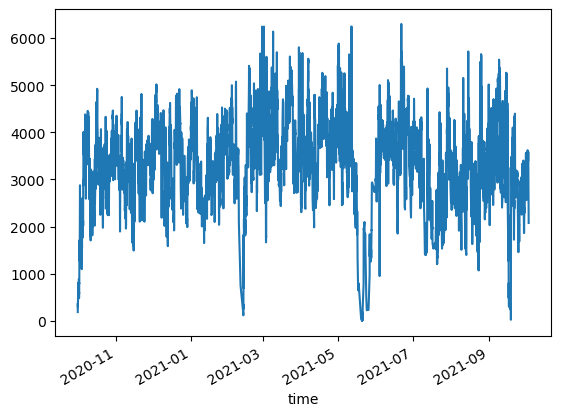

In [233]:
start_end_df.sample(10000).set_index('time').sort_index()['currently_running'].plot()

In [249]:
num_min_floor = start_end_df
num_min_floor['time'] = start_end_df['time'].dt.floor('min')
num_jobs_df = num_min_floor.groupby('time')['currently_running'].max().reset_index(name='num_jobs')
num_jobs_df.head()

,time,num_jobs
0,2020-10-01 00:03:00,9.0
1,2020-10-01 00:05:00,25.0
2,2020-10-01 00:10:00,25.0
3,2020-10-01 00:11:00,34.0
4,2020-10-01 00:12:00,33.0


In [250]:
num_jobs_df['num_jobs'].describe()

count    502752.000000
mean       3259.350085
std         951.644914
min           0.000000
25%        2695.000000
50%        3294.000000
75%        3888.000000
max        6390.000000
Name: num_jobs, dtype: float64

In [251]:
num_jobs_df = num_jobs_df.set_index('time')
num_jobs_df = num_jobs_df.resample('1min').asfreq().ffill()
num_jobs_df.head()

,num_jobs
time,
2020-10-01 00:03:00,9.0
2020-10-01 00:04:00,9.0
2020-10-01 00:05:00,25.0
2020-10-01 00:06:00,25.0
2020-10-01 00:07:00,25.0


<Axes: xlabel='time'>

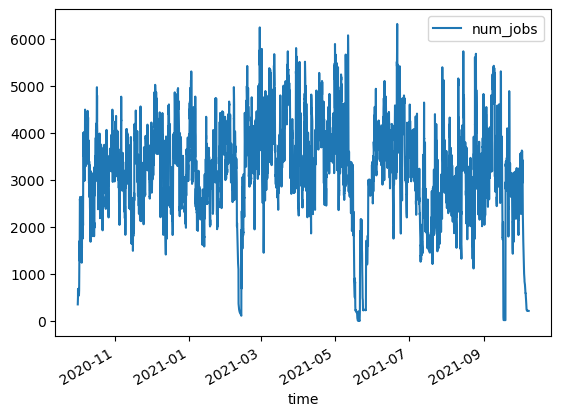

In [252]:
num_jobs_df.sample(10000).sort_index().plot()